### Mobile Price Classification

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('mobileprice.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

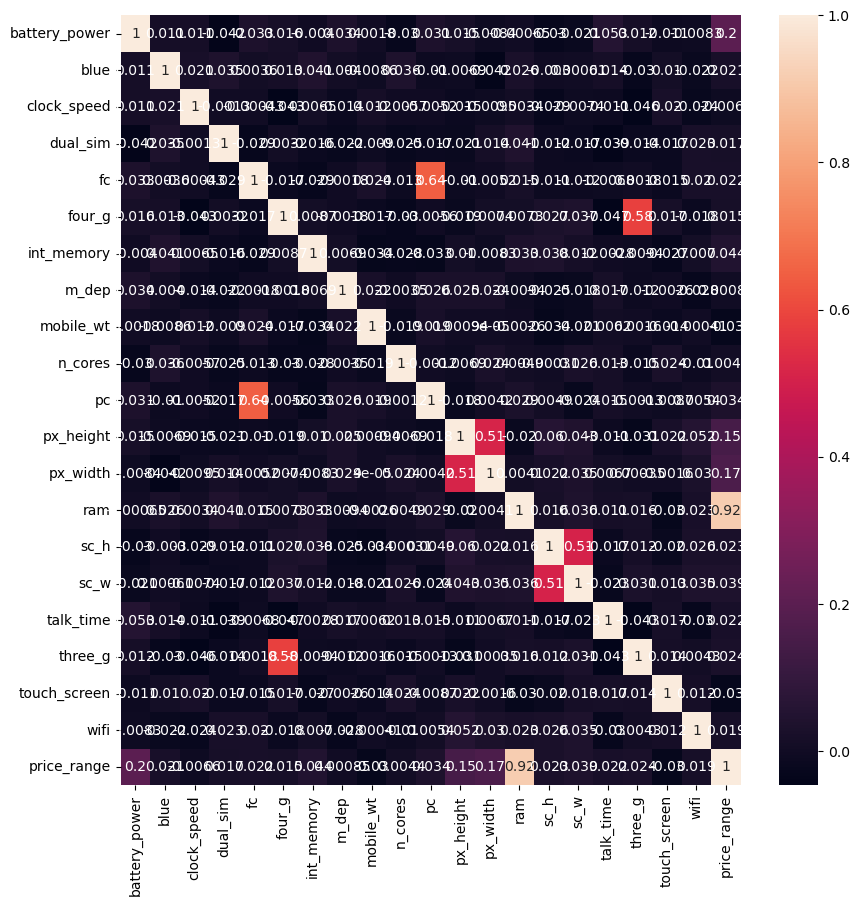

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True);

In [9]:
x=train.drop("price_range",axis=1)
y=train["price_range"]

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [11]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [12]:
pred1=g.predict(x)
pred2=b.predict(x)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [14]:
accuracy_score(pred1,y)

0.82

In [15]:
confusion_matrix(pred1,y)

array([[457,  42,   0,   0],
       [ 43, 368,  85,   1],
       [  0,  90, 368,  52],
       [  0,   0,  47, 447]], dtype=int64)

In [16]:
print(classification_report(pred1,y))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       499
           1       0.74      0.74      0.74       497
           2       0.74      0.72      0.73       510
           3       0.89      0.90      0.90       494

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



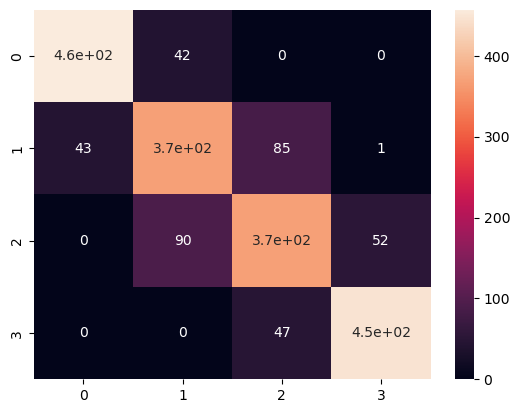

In [17]:
sns.heatmap(confusion_matrix(pred1,y),annot=True);

In [18]:
accuracy_score(pred2,y)

0.278

In [19]:
confusion_matrix(pred2,y)

array([[125, 112,  99,  85],
       [ 48,  47,  47,  37],
       [135, 148, 159, 153],
       [192, 193, 195, 225]], dtype=int64)

In [20]:
print(classification_report(pred2,y))

              precision    recall  f1-score   support

           0       0.25      0.30      0.27       421
           1       0.09      0.26      0.14       179
           2       0.32      0.27      0.29       595
           3       0.45      0.28      0.34       805

    accuracy                           0.28      2000
   macro avg       0.28      0.28      0.26      2000
weighted avg       0.34      0.28      0.29      2000



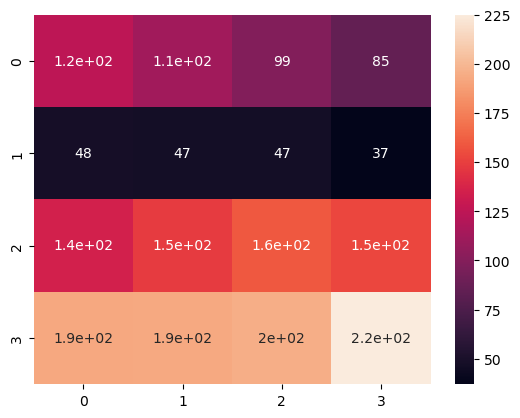

In [21]:
sns.heatmap(confusion_matrix(pred2,y),annot=True);

In [22]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [23]:
k.fit(x,y)

KNeighborsClassifier()

In [24]:
pred3=k.predict(x)

C:\Users\unlu-\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
accuracy_score(pred3,y)

0.954

In [26]:
confusion_matrix(pred3,y)

array([[487,  12,   0,   0],
       [ 13, 475,  21,   0],
       [  0,  13, 463,  17],
       [  0,   0,  16, 483]], dtype=int64)

In [27]:
print(classification_report(pred3,y))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       499
           1       0.95      0.93      0.94       509
           2       0.93      0.94      0.93       493
           3       0.97      0.97      0.97       499

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [30]:
l.fit(x,y)

LogisticRegression()

In [31]:
pred4=l.predict(x)

In [32]:
accuracy_score(pred4,y)

0.636

In [33]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [34]:
d.fit(x,y)

DecisionTreeClassifier()

In [35]:
pred5=d.predict(x)

In [36]:
accuracy_score(pred5,y)

1.0

In [37]:
confusion_matrix(pred5,y)

array([[500,   0,   0,   0],
       [  0, 500,   0,   0],
       [  0,   0, 500,   0],
       [  0,   0,   0, 500]], dtype=int64)